In [2]:
import numpy as np
import pandas as pd

import os 
for dirname,_,filenames in os.walk('/KDD'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [3]:
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np


from tensorflow.keras import layers
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
dtypes = {
"duration": np.int8,
"protocol_type": np.object,
"service": np.object,
"flag": np.object,
"src_bytes":  np.int8,
"dst_bytes":  np.int8,
"land": np.int8,
"wrong_fragment":  np.int8,
"urgent": np.int8,
"hot": np.int8,
"m_failed_logins":  np.int8,
"logged_in":  np.int8,
"num_compromised":  np.int8,
"root_shell":  np.int8,
"su_attempted":  np.int8,
"num_root": np.int8,
"num_file_creations":  np.int8,
"num_shells":  np.int8,
"num_access_files":  np.int8,
"num_outbound_cmds":  np.int8,
"is_host_login":  np.int8,
"is_guest_login":  np.int8,
"count": np.int8,
"srv_count":  np.int8,
"serror_rate": np.float16,
"srv_serror_rate": np.float16,
"rerror_rate": np.float16,
"srv_rerror_rate": np.float16,
"same_srv_rate": np.float16,
"diff_srv_rate": np.float16,
"srv_diff_host_rate": np.float16,
"dst_host_count":  np.int8,
"dst_host_srv_count":  np.int8,
"dst_host_same_srv_rate": np.float16,
"dst_host_diff_srv_rate": np.float16,
"dst_host_same_src_port_rate": np.float16,
"dst_host_srv_diff_host_rate": np.float16,
"dst_host_serror_rate": np.float16,
"dst_host_srv_serror_rate": np.float16,
"dst_host_rerror_rate": np.float16,
"dst_host_srv_rerror_rate": np.float16,
"label": np.object
}

columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","m_failed_logins",
"logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
"num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
"same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
"dst_host_srv_rerror_rate","label"]

df = pd.read_csv("KDDCUP/kddcup.data_10_percent.gz", sep=",", names=columns, dtype=dtypes, index_col=None)

In [8]:
df.label.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [9]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,-75,74,0,0,0,0,...,9,1.0,0.0,0.109985,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,-17,-26,0,0,0,0,...,19,1.0,0.0,0.049988,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,-21,57,0,0,0,0,...,29,1.0,0.0,0.029999,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,-37,57,0,0,0,0,...,39,1.0,0.0,0.029999,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,-39,-16,0,0,0,0,...,49,1.0,0.0,0.020004,0.0,0.0,0.0,0.0,0.0,normal.


In [13]:
new_features=['dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate','label']

In [17]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,m_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.0,494021.000000,494021.0,494021.0,494021.000000,494021.000000
mean,0.182921,5.899960,1.544438,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.005548,...,1.032778,1.657847,NaN,0.030914,NaN,0.006683,NaN,NaN,0.058136,0.057404
std,7.746121,28.748878,33.940572,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,0.252424,...,21.726016,18.781605,0.000000,0.109314,0.0,0.042084,0.0,0.0,0.230713,0.230225
min,-128.000000,-128.000000,-128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,...,-128.000000,-128.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,0.409912,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
50%,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,1.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000
75%,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,0.040009,1.0,0.000000,0.0,0.0,0.000000,0.000000
max,127.000000,127.000000,127.000000,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,116.000000,...,127.000000,127.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000


In [18]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'm_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [19]:
df.shape

(494021, 42)

In [20]:
df.label

0         normal.
1         normal.
2         normal.
3         normal.
4         normal.
           ...   
494016    normal.
494017    normal.
494018    normal.
494019    normal.
494020    normal.
Name: label, Length: 494021, dtype: object

In [21]:
df.label=df.label.apply(lambda x:0 if x == 'normal.' else 1)

In [25]:
df.label.sum()

396743

In [26]:
df = df[new_features]

In [28]:
df
# 여기까지 요약은 데이터 불러와서 어떤 기준인지는 모르겠는데 42개 열 중에서 9개만 선택했다( 변수를 9개만 선택?)
# 그리고 normal을 0, abnoraml을 1로 정의했다.

,dst_bytes,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,label
0,74,1,8,8,9,9,1.0,0.109985,0
1,-26,1,8,8,19,19,1.0,0.049988,0
2,57,1,8,8,29,29,1.0,0.029999,0
3,57,1,6,6,39,39,1.0,0.029999,0
4,-16,1,6,6,49,49,1.0,0.020004,0
...,...,...,...,...,...,...,...,...,...
494016,89,1,4,5,86,-1,1.0,0.010002,0
494017,-18,1,6,6,6,-1,1.0,0.170044,0
494018,-80,1,6,18,16,-1,1.0,0.059998,0
494019,-80,1,6,12,26,-1,1.0,0.040009,0


In [30]:
#라벨 인코딩, 아마 제 생각으로는 label 이 object 형으로 되어있기 때문에 수치형 데이터로 바꿔준듯
for column in df.columns:
    if df[column].dtype == np.object:
        encoded = LabelEncoder()
        
        encoded.fit(df[column])
        df[column] = encoded.transform(df[column])

In [31]:
df

,dst_bytes,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,label
0,74,1,8,8,9,9,1.0,0.109985,0
1,-26,1,8,8,19,19,1.0,0.049988,0
2,57,1,8,8,29,29,1.0,0.029999,0
3,57,1,6,6,39,39,1.0,0.029999,0
4,-16,1,6,6,49,49,1.0,0.020004,0
...,...,...,...,...,...,...,...,...,...
494016,89,1,4,5,86,-1,1.0,0.010002,0
494017,-18,1,6,6,6,-1,1.0,0.170044,0
494018,-80,1,6,18,16,-1,1.0,0.059998,0
494019,-80,1,6,12,26,-1,1.0,0.040009,0


In [32]:
#randomly sample 500 data point for training
df_train=df[df.label==0].sample(500)

In [59]:
df_train

,dst_bytes,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate
343553,4,0,1,1,9,9,1.000000,0.109985
136512,83,1,1,1,86,-50,0.799805,0.010002
6030,106,1,17,17,94,-1,1.000000,0.010002
449997,-111,0,1,1,-1,-21,0.919922,0.000000
52625,0,0,1,1,55,90,0.979980,0.979980
...,...,...,...,...,...,...,...,...
453598,0,0,6,5,-1,23,0.090027,0.109985
345330,114,0,2,4,-1,-16,0.939941,0.000000
82226,-123,1,17,21,-1,-1,1.000000,0.000000
80899,113,1,1,1,3,-1,1.000000,0.330078


In [34]:
#remove the item sampled from our dataset
index_list=df_train.index
df=df.drop(index_list)

In [36]:
df

,dst_bytes,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,label
0,74,1,8,8,9,9,1.0,0.109985,0
1,-26,1,8,8,19,19,1.0,0.049988,0
2,57,1,8,8,29,29,1.0,0.029999,0
3,57,1,6,6,39,39,1.0,0.029999,0
4,-16,1,6,6,49,49,1.0,0.020004,0
...,...,...,...,...,...,...,...,...,...
494016,89,1,4,5,86,-1,1.0,0.010002,0
494017,-18,1,6,6,6,-1,1.0,0.170044,0
494018,-80,1,6,18,16,-1,1.0,0.059998,0
494019,-80,1,6,12,26,-1,1.0,0.040009,0


In [37]:
df_train = df_train.drop('label',axis=1)

In [38]:
df_train

,dst_bytes,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate
343553,4,0,1,1,9,9,1.000000,0.109985
136512,83,1,1,1,86,-50,0.799805,0.010002
6030,106,1,17,17,94,-1,1.000000,0.010002
449997,-111,0,1,1,-1,-21,0.919922,0.000000
52625,0,0,1,1,55,90,0.979980,0.979980
...,...,...,...,...,...,...,...,...
453598,0,0,6,5,-1,23,0.090027,0.109985
345330,114,0,2,4,-1,-16,0.939941,0.000000
82226,-123,1,17,21,-1,-1,1.000000,0.000000
80899,113,1,1,1,3,-1,1.000000,0.330078


In [39]:
df_train.shape

(500, 8)

In [41]:
# https://leestation.tistory.com/776
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization()) 
    # 배치 정규화는 평균 출력을 0에 가깝게 유지하고 출력 표준 편차를 1에 가깝게 유지하는 변환을 적용합니다.
    model.add(layers.LeakyReLU())
    # LeakyReLU는 ReLU와 달리 음수값을 완전히 0으로 만들지 않고 알파값을 곱해주어 0에 가깝게만 만든다.

    model.add(layers.Dense(16))
    assert model.output_shape == (None,16 ) # Note: None is the batch size
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(8))
    assert model.output_shape == (None,8 )
   
    
    return model

In [43]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False,
                                    input_shape=[1,8]))
   
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(32, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

   
    model.add(layers.Dense(1))
   # model.add(layers.Softmax())

    return model

In [44]:
generator=make_generator_model()
discriminator=make_discriminator_model()

In [45]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
#이 부분은 추가로 확인해봐야 할 듯

In [46]:
# 감별자 손실함수
#이 메서드는 감별자가 가짜 이미지에서 얼마나 진짜 이미지를 잘 판별하는지 수치화합니다. 
#진짜 이미지에 대한 감별자의 예측과 1로 이루어진 행렬을 비교하고,
#가짜 (생성된) 이미지에 대한 감별자의 예측과 0으로 이루어진 행렬을 비교합니다.
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    #tf.ones_like(tensor, dtype=None, name=None). 모든 원소의 값이 1인 텐서를 생성합니다.
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    #tf.zeros_like(tensor, dtype=None, name=None). 모든 원소의 값이 0인 텐서를 생성합니다.
    total_loss = real_loss + fake_loss
    return total_loss

In [47]:
bce = tf.keras.losses.BinaryCrossentropy()
loss = bce([1., 1., 1., 1.], [1., 1., 1., 1.])
print('Loss: ', loss.numpy())  # Loss: 11.522857

Loss:  0.0


In [48]:
#생성자의 손실함수는 감별자를 얼마나 잘 속였는지에 대해 수치화를 합니다. 
#직관적으로 생성자가 원활히 수행되고 있다면, 감별자는 가짜 이미지를 진짜 (또는 1)로 분류를 할 것입니다. 
#여기서 우리는 생성된 이미지에 대한 감별자의 결정을 1로 이루어진 행렬과 비교를 할 것입니다.
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [49]:
#생성자와 감별자는 훈련이 따로 되기 때문에 optimizer도 따로 설정해줘야 한다. 옵티마이저는 기울기 구해서 파라미터 조정하는데 사용
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [50]:
EPOCHS = 1000
noise_dim = 100
#num_examples_to_generate = 16
BATCH_SIZE = 64

In [51]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    images=tf.reshape(images,(1,8))
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
     
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return (gen_loss,disc_loss)

In [52]:
history=dict()
history['gen']=[]
history['dis']=[]
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:

           gen_loss,dis_loss= train_step(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

In [53]:
x_train=df_train.values
train(x_train,EPOCHS) 

Time for epoch 1 is 3.6899068355560303 sec 
Time for epoch 2 is 0.7584893703460693 sec 
Time for epoch 3 is 0.7140903472900391 sec 
Time for epoch 4 is 0.9497551918029785 sec 
Time for epoch 5 is 0.7980387210845947 sec 
Time for epoch 6 is 0.8514394760131836 sec 
Time for epoch 7 is 0.8696744441986084 sec 
Time for epoch 8 is 0.9053382873535156 sec 
Time for epoch 9 is 0.7749614715576172 sec 
Time for epoch 10 is 0.751680850982666 sec 
Time for epoch 11 is 0.7336649894714355 sec 
Time for epoch 12 is 0.7696056365966797 sec 
Time for epoch 13 is 0.9912047386169434 sec 
Time for epoch 14 is 0.839268684387207 sec 
Time for epoch 15 is 0.7859847545623779 sec 
Time for epoch 16 is 0.7081060409545898 sec 
Time for epoch 17 is 0.7982990741729736 sec 
Time for epoch 18 is 1.0502862930297852 sec 
Time for epoch 19 is 0.988466739654541 sec 
Time for epoch 20 is 0.8936192989349365 sec 
Time for epoch 21 is 0.9221503734588623 sec 
Time for epoch 22 is 0.9662282466888428 sec 
Time for epoch 23 is 0

Time for epoch 156 is 1.0741517543792725 sec 
Time for epoch 157 is 0.8535866737365723 sec 
Time for epoch 158 is 0.8339605331420898 sec 
Time for epoch 159 is 0.8612387180328369 sec 
Time for epoch 160 is 1.055177927017212 sec 
Time for epoch 161 is 0.7907466888427734 sec 
Time for epoch 162 is 0.7649521827697754 sec 
Time for epoch 163 is 0.8347389698028564 sec 
Time for epoch 164 is 0.924781322479248 sec 
Time for epoch 165 is 0.8439898490905762 sec 
Time for epoch 166 is 0.7569608688354492 sec 
Time for epoch 167 is 0.7766156196594238 sec 
Time for epoch 168 is 0.7297523021697998 sec 
Time for epoch 169 is 0.9449291229248047 sec 
Time for epoch 170 is 1.059387445449829 sec 
Time for epoch 171 is 0.950636625289917 sec 
Time for epoch 172 is 0.8290262222290039 sec 
Time for epoch 173 is 0.9464774131774902 sec 
Time for epoch 174 is 0.8786494731903076 sec 
Time for epoch 175 is 1.0053117275238037 sec 
Time for epoch 176 is 0.7650015354156494 sec 
Time for epoch 177 is 0.92114210128784

Time for epoch 335 is 0.7676138877868652 sec 
Time for epoch 336 is 0.742016077041626 sec 
Time for epoch 337 is 0.875497579574585 sec 
Time for epoch 338 is 1.0120437145233154 sec 
Time for epoch 339 is 0.8013510704040527 sec 
Time for epoch 340 is 0.7150862216949463 sec 
Time for epoch 341 is 1.0210661888122559 sec 
Time for epoch 342 is 0.8215184211730957 sec 
Time for epoch 343 is 1.0398550033569336 sec 
Time for epoch 344 is 0.8169255256652832 sec 
Time for epoch 345 is 0.763526201248169 sec 
Time for epoch 346 is 0.7187473773956299 sec 
Time for epoch 347 is 1.132066249847412 sec 
Time for epoch 348 is 0.9015898704528809 sec 
Time for epoch 349 is 0.7065515518188477 sec 
Time for epoch 350 is 0.7627017498016357 sec 
Time for epoch 351 is 0.6959505081176758 sec 
Time for epoch 352 is 0.9109292030334473 sec 
Time for epoch 353 is 0.7537362575531006 sec 
Time for epoch 354 is 0.7180817127227783 sec 
Time for epoch 355 is 0.7415289878845215 sec 
Time for epoch 356 is 0.79287886619567

Time for epoch 514 is 1.0657315254211426 sec 
Time for epoch 515 is 0.7118017673492432 sec 
Time for epoch 516 is 0.9990577697753906 sec 
Time for epoch 517 is 0.7735569477081299 sec 
Time for epoch 518 is 0.7769217491149902 sec 
Time for epoch 519 is 0.6716439723968506 sec 
Time for epoch 520 is 0.6901557445526123 sec 
Time for epoch 521 is 0.667621374130249 sec 
Time for epoch 522 is 0.8294475078582764 sec 
Time for epoch 523 is 0.9960932731628418 sec 
Time for epoch 524 is 0.7091138362884521 sec 
Time for epoch 525 is 0.685854434967041 sec 
Time for epoch 526 is 0.7335014343261719 sec 
Time for epoch 527 is 0.746004581451416 sec 
Time for epoch 528 is 0.7851250171661377 sec 
Time for epoch 529 is 0.687161922454834 sec 
Time for epoch 530 is 0.7424113750457764 sec 
Time for epoch 531 is 0.6877009868621826 sec 
Time for epoch 532 is 0.7498049736022949 sec 
Time for epoch 533 is 0.8158175945281982 sec 
Time for epoch 534 is 0.7653131484985352 sec 
Time for epoch 535 is 0.71470975875854

Time for epoch 693 is 1.3535287380218506 sec 
Time for epoch 694 is 1.440319538116455 sec 
Time for epoch 695 is 3.2991058826446533 sec 
Time for epoch 696 is 2.6514155864715576 sec 
Time for epoch 697 is 1.913424015045166 sec 
Time for epoch 698 is 0.9726583957672119 sec 
Time for epoch 699 is 0.7320423126220703 sec 
Time for epoch 700 is 0.818824291229248 sec 
Time for epoch 701 is 0.8467354774475098 sec 
Time for epoch 702 is 0.9274885654449463 sec 
Time for epoch 703 is 0.849311351776123 sec 
Time for epoch 704 is 0.9674127101898193 sec 
Time for epoch 705 is 0.7972865104675293 sec 
Time for epoch 706 is 1.0593044757843018 sec 
Time for epoch 707 is 0.9837028980255127 sec 
Time for epoch 708 is 1.1433179378509521 sec 
Time for epoch 709 is 1.4795584678649902 sec 
Time for epoch 710 is 1.0166869163513184 sec 
Time for epoch 711 is 0.7568657398223877 sec 
Time for epoch 712 is 0.786895751953125 sec 
Time for epoch 713 is 0.8798224925994873 sec 
Time for epoch 714 is 1.003845691680908

Time for epoch 872 is 0.8856313228607178 sec 
Time for epoch 873 is 0.754981517791748 sec 
Time for epoch 874 is 0.8357646465301514 sec 
Time for epoch 875 is 0.7001276016235352 sec 
Time for epoch 876 is 0.7001283168792725 sec 
Time for epoch 877 is 0.8547141551971436 sec 
Time for epoch 878 is 0.7170822620391846 sec 
Time for epoch 879 is 0.6931462287902832 sec 
Time for epoch 880 is 0.7031197547912598 sec 
Time for epoch 881 is 0.7400212287902832 sec 
Time for epoch 882 is 0.9015886783599854 sec 
Time for epoch 883 is 0.7130932807922363 sec 
Time for epoch 884 is 0.7101006507873535 sec 
Time for epoch 885 is 0.7110984325408936 sec 
Time for epoch 886 is 0.833770751953125 sec 
Time for epoch 887 is 0.7968673706054688 sec 
Time for epoch 888 is 0.7031190395355225 sec 
Time for epoch 889 is 0.708106517791748 sec 
Time for epoch 890 is 0.735034704208374 sec 
Time for epoch 891 is 0.8427467346191406 sec 
Time for epoch 892 is 0.7687878608703613 sec 
Time for epoch 893 is 0.78464913368225

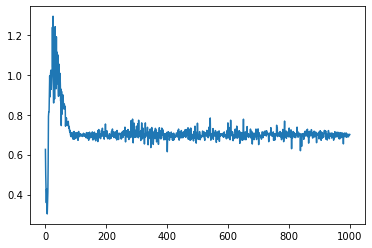

In [54]:
plt.plot(history['gen'])

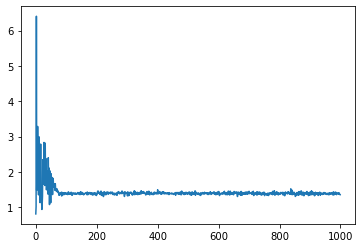

In [60]:
plt.plot(history['dis'])

In [61]:
y_test=df.label
x_test=df.drop('label',axis=1).values.reshape(-1,1,8)

In [62]:
y_pred=discriminator.predict(x_test)

In [63]:
from sklearn.metrics import average_precision_score, accuracy_score ,recall_score, f1_score

Text(0, 0.5, 'y_pred')

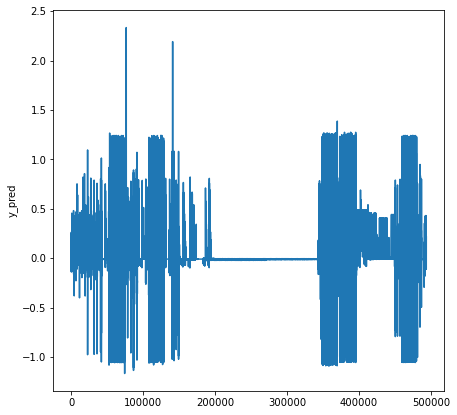

In [64]:
#range of output value
plt.figure(figsize=(7,7))
plt.plot(range(len(y_pred)),y_pred.reshape(-1,1))
plt.ylabel('y_pred')

In [65]:
#looking for the optimal probability threshold
#prob=[0.5,0.55,0.6,0.65,0.75,0.8,0.85,0.9,0.95,1,2,2.5,5]
prob=[-0.2,-0.1,-0.05,0,0.005,0.1]
for p in prob:
    pred_value =[1 if i<p   else 0 for i in y_pred]
    f1=f1_score(y_test,pred_value)
    acc=accuracy_score(y_test,pred_value)
    precision=average_precision_score(y_test,pred_value)
    recall= recall_score(y_test,pred_value)
    print(f'prob ={p} and f1 score ={f1} : accuracy={acc} : precision={precision} : recall={recall}')
    print(pred_value.count(0),pred_value.count(1))

prob =-0.2 and f1 score =0.17098180780086658 : accuracy=0.2703572897607194 : precision=0.8210503970330452 : recall=0.09359711450485579
455902 37619
prob =-0.1 and f1 score =0.2009706895149264 : accuracy=0.28345906253229347 : precision=0.8225649493123465 : recall=0.11209271493132834
447692 45829
prob =-0.05 and f1 score =0.209302526713629 : accuracy=0.2590062023703145 : precision=0.7956289637867862 : recall=0.12199585121854702
427766 65755
prob =0 and f1 score =0.8178620091344214 : accuracy=0.7137041787482195 : precision=0.8303680056487088 : recall=0.7995780643892898
114517 379004
prob =0.005 and f1 score =0.815229270914652 : accuracy=0.7074531782842067 : precision=0.8232862711034186 : recall=0.8028018137686109
108874 384647
prob =0.1 and f1 score =0.8018957648799357 : accuracy=0.6733269708887768 : precision=0.7861799273177619 : recall=0.8224392112778297
76450 417071
